In [1]:
#Dependencies
import tweepy
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
from config import consumer_key, consumer_secret, access_token, access_token_secret
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [4]:
#Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

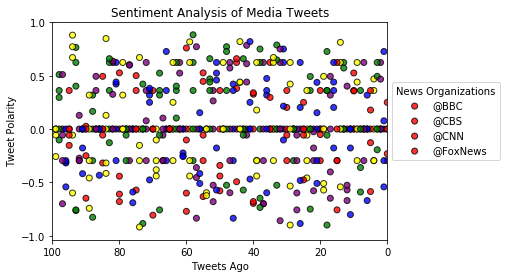

In [11]:
# Target Search Term
news_orgs = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]
results_list = []

for org in news_orgs:
    # Create empty sentiment lists
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    index = []
    count = 0 
    
    # Grab the most recent 100 tweets
    public_tweets = api.search(org, count=100, result_type="recent")
    
        # Loop
    for tweet in public_tweets["statuses"]:

        # Enable Vader Analyzer
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
    
        # Adding to the sentiment list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        index.append(count)
        count = count + 1
        
    lgnd = plt.legend(news_orgs, title= 'News Organizations', bbox_to_anchor=(1, 0.75))
    plt.scatter(index, compound_list, facecolors=['red','blue','purple','green','yellow'], edgecolors="black", linewidth=1, marker='o', alpha=0.8)
    plt.title("Sentiment Analysis of Media Tweets")
    plt.xlabel("Tweets Ago")
    plt.ylabel("Tweet Polarity")
    plt.legend
    plt.xlim(len(compound_list), 0)
    plt.yticks([-1, -.5, 0, .5, 1])
        
# Store the Average Sentiments
    sentiment = {"News Organization": org,
                 "Compound": np.mean(compound_list),
                 "Positive": np.mean(positive_list),
                 "Negative": np.mean(negative_list),
                 "Neutral": np.mean(neutral_list)}
    results_list.append(sentiment)

# Save the plot
plt.savefig("plot1.png")
#Show the plot
plt.show()


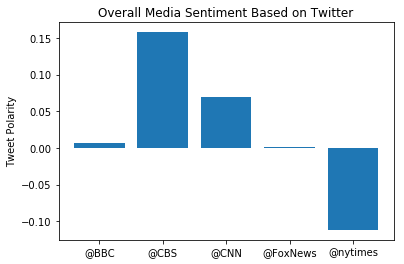

In [9]:
compounds = []
for sentiment in results_list:
    compounds.append(sentiment["Compound"])
    
plt.title("Overall Media Sentiment Based on Twitter")
plt.ylabel("Tweet Polarity")
    
plt.bar(news_orgs, compounds)

# Save the plot
plt.savefig("plot2.png")
#Show the plot
plt.show()

In [10]:
news_orgs_df = pd.DataFrame(results_list).set_index('News Organization').round(3).reset_index()
news_orgs_df.head()

,News Organization,Compound,Negative,Neutral,Positive
0,@BBC,0.006,0.067,0.856,0.077
1,@CBS,0.158,0.057,0.845,0.098
2,@CNN,0.069,0.059,0.842,0.098
3,@FoxNews,0.002,0.067,0.864,0.069
4,@nytimes,-0.112,0.104,0.823,0.073


In [8]:
news_orgs_df.to_csv("NewsMood.csv", encoding='utf-8', index=False)
